# Conf

In [1]:
import os

In [2]:
class cfg: 

    # to store HF pre-trained models weights and configs
    HF_CACHE_ROOT = os.path.join("..", "..", "..",
                                 "data",
                                 "05_cache", 
                                 "HF"
                                )


# HF Cache management

https://huggingface.co/docs/datasets/en/cache

In [3]:
print("HF_HOME:", os.environ.get("HF_HOME"))
os.environ["HF_HOME"] = cfg.HF_CACHE_ROOT
print("HF_HOME:", os.environ.get("HF_HOME"))

HF_HOME: None
HF_HOME: ../../../data/05_cache/HF


In [4]:
print("HF_HUB_CACHE:", os.environ.get("HF_HUB_CACHE"))
os.environ["HF_HUB_CACHE"] = cfg.HF_CACHE_ROOT
print("HF_HUB_CACHE:", os.environ.get("HF_HUB_CACHE"))

HF_HUB_CACHE: None
HF_HUB_CACHE: ../../../data/05_cache/HF


# Import libraries

In [41]:

from dotenv import load_dotenv


#_________
import torch

#__________
from transformers import pipeline

#_________
import pandas as pd 

# Service Token Authentication

In [7]:
# Verify token is loaded
load_dotenv()

HF_TOKEN_READ = os.getenv("07_FR_phone_TokenType_READ")
print(f"Token loaded: {'Yes' if HF_TOKEN_READ else 'No'}")

Token loaded: Yes


# Chapter 2

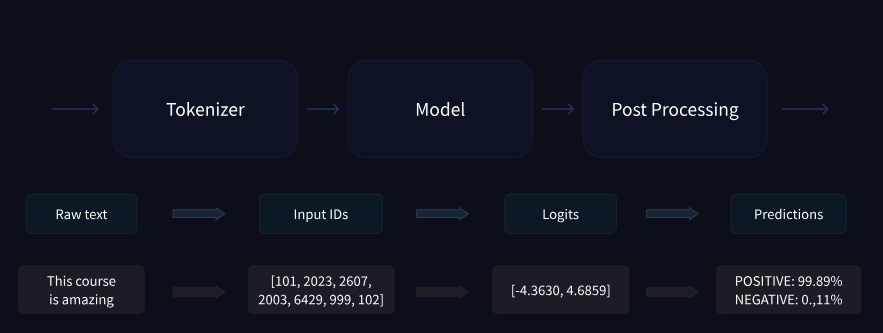

## Task: Sentiment Analysis

### Tokenizer - Processing Raw text

https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english

In [8]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [12]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, 
                   padding=True, 
                   truncation=True, 
                   return_tensors="pt",
                  )
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [26]:
inputs.keys() # it is not exactly a python dict, it is an special data structure of HF.

KeysView({'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])})

In [23]:
# Regular dict operations mostly work:
for key in inputs.keys():
    print(key)

input_ids
token_type_ids
attention_mask


In [25]:
for value in inputs.values():
    print(value.shape)

torch.Size([2, 16])
torch.Size([2, 16])
torch.Size([2, 16])


### Model load without Head 

In [38]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

Loading weights:   0%|          | 0/100 [00:00<?, ?it/s]

DistilBertModel LOAD REPORT from: distilbert-base-uncased-finetuned-sst-2-english
Key                   | Status     |  | 
----------------------+------------+--+-
classifier.bias       | UNEXPECTED |  | 
classifier.weight     | UNEXPECTED |  | 
pre_classifier.bias   | UNEXPECTED |  | 
pre_classifier.weight | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


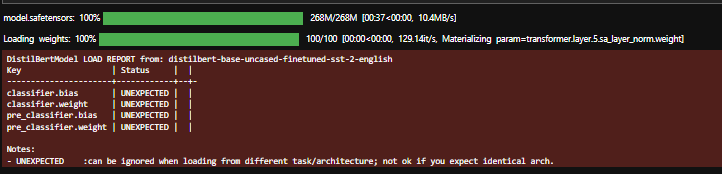


What's Happening Here:
- You're loading AutoModel (base model without task-specific heads)
- The checkpoint includes a classifier head (fine-tuned for SST-2 sentiment analysis)
- The model architecture you instantiated doesn't have those classifier layers


In [39]:
outputs = model(**inputs)
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.1798,  0.2333,  0.6321,  ..., -0.3017,  0.5008,  0.1481],
         [ 0.2758,  0.6497,  0.3200,  ..., -0.0760,  0.5136,  0.1329],
         [ 0.9046,  0.0985,  0.2950,  ...,  0.3352, -0.1407, -0.6464],
         ...,
         [ 0.1466,  0.5661,  0.3235,  ..., -0.3376,  0.5100, -0.0561],
         [ 0.7500,  0.0487,  0.1738,  ...,  0.4684,  0.0030, -0.6084],
         [ 0.0519,  0.3729,  0.5223,  ...,  0.3584,  0.6500, -0.3883]],

        [[-0.2937,  0.7283, -0.1497,  ..., -0.1187, -1.0227, -0.0422],
         [-0.2206,  0.9384, -0.0951,  ..., -0.3643, -0.6605,  0.2407],
         [-0.1536,  0.8988, -0.0728,  ..., -0.2189, -0.8528,  0.0710],
         ...,
         [-0.3017,  0.9002, -0.0200,  ..., -0.1082, -0.8412, -0.0861],
         [-0.3338,  0.9674, -0.0729,  ..., -0.1952, -0.8181, -0.0634],
         [-0.3454,  0.8824, -0.0426,  ..., -0.0993, -0.8329, -0.1065]]],
       grad_fn=<NativeLayerNormBackward0>), hidden_states=None, attentions=None)

In [40]:
print(outputs.last_hidden_state.shape)

torch.Size([2, 16, 768])


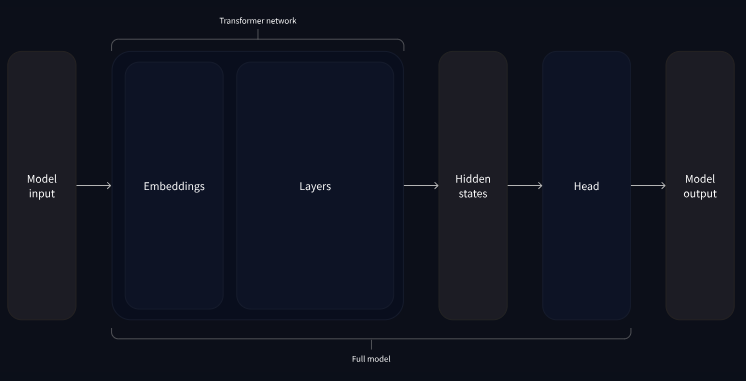

### Model Load with Head

In [32]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

In [35]:
outputs_w_head = model(**inputs)
outputs_w_head

SequenceClassifierOutput(loss=None, logits=tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [37]:
print(outputs_w_head.logits.shape)

torch.Size([2, 2])


### Postprocessing the output

In [43]:
predictions = torch.nn.functional.softmax(outputs_w_head.logits, dim=-1)
print(predictions)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


In [49]:
# Getting the labels from the model 
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

In [57]:
[f"{model.config.id2label[idx_label.item()]}: {raw_inputs[i]}" for i, idx_label in enumerate(predictions.argmax(dim=1))]

["POSITIVE: I've been waiting for a HuggingFace course my whole life.",
 'NEGATIVE: I hate this so much!']

### all together with pipeline()

In [59]:
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
classifier = pipeline("sentiment-analysis", model=checkpoint)
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

[{'label': 'POSITIVE', 'score': 0.9598047137260437},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]